# Fire Incidents in Pittsburgh 
## By Anirudh Peesay

![image](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExOHFwcjZxMWowbmJ3ZTJkNW5zZWR5MndzZGRrMmQ4NzV4Mm50YWsweiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/nrXif9YExO9EI/giphy.gif)

We start by importing the fires data using pandas.

In [2]:
import pandas as pd

fire = pd.read_csv("fires_list.tsv",sep="\t")

We want to analyze the fire incidents in each neighborhood. For example, we can look at Fineview:

In [3]:
query_mask = fire['neighborhood']== "Fineview"
Fineview_fires = fire[query_mask]
Fineview_fires.head(10)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
206,207,F140015339,131.0,Passenger vehicle fire,"LAFAYETTE AVE & FEDERAL STR, PITTSBURGH PA 15212",0,2014-02-26T12:17:12,231EN38,2614.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.465099,-80.010044
219,220,F140004033,111.0,Building fire,"2000 BLOCK LETSCHE ST, PITTSBURGH PA 15214",1,2014-01-12T15:38:37,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.463473,-80.008452
258,259,F140008680,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15214",0,2014-01-30T17:41:23,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
833,834,F150056424,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2015-07-20T21:48:00,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
845,846,F160022797,150.0,"Outside rubbish fire, Other","1700 BLOCK BELLEAU DR, PITTSBURGH PA 15219",0,2016-03-25T09:04:16,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
1212,1213,F160039740,113.0,"Cooking fire, confined to container","300 BLOCK LAFAYETTE AVE, PITTSBURGH PA 15212",1,2016-05-26T18:58:43,231EN38,2614.0,Fineview,6.0,26.0,4.200325e+10,1.0,26.0,1.0,1-10,40.465299,-80.007849
1535,1536,F170056775,113.0,"Cooking fire, confined to container","1900 BLOCK HOWARD ST, PITTSBURGH PA 15212",1,2017-07-11T20:33:06,231EN32,2509.0,Fineview,1.0,24.0,4.200325e+10,1.0,24.0,1.0,1-6,40.464692,-80.000201
1536,1537,F170056777,113.0,"Cooking fire, confined to container","1900 BLOCK HOWARD ST, PITTSBURGH PA 15212",1,2017-07-11T20:58:20,231EN32,2509.0,Fineview,1.0,24.0,4.200325e+10,1.0,24.0,1.0,1-6,40.464692,-80.000201
1574,1575,F160062841,113.0,"Cooking fire, confined to container","1800 BLOCK LETSCHE ST, PITTSBURGH PA 15214",1,2016-08-11T23:28:07,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.462628,-80.008239


 We suspect that Building Fires and Vehicle Fires are the most severe incident types, so let's analyze these types of fires for each neighborhood.

In [4]:
query_mask = fire['type_description']== "Building fire"
building = fire[query_mask]

In [5]:
counter = 0
for index, row in fire.iterrows():
    type = row['type_description']
    if type == "Building fire":
        counter = counter + 1
print(counter)

2052


There are 2052 total Building Fires counted in all neighboorhoods.

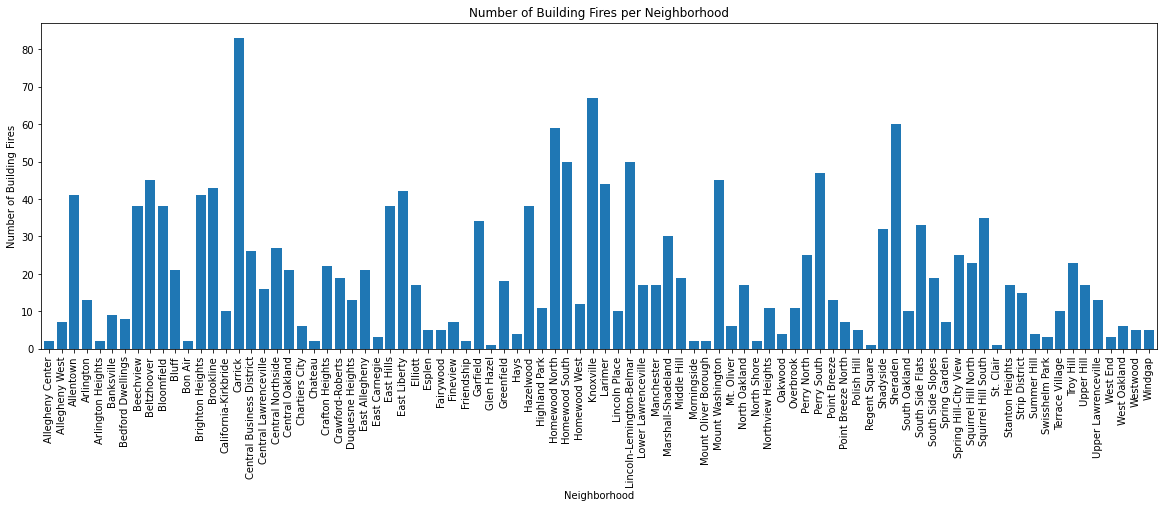

In [6]:
import matplotlib.pyplot as plt

building["neighborhood"].value_counts().sort_index().plot(kind='bar', width=.8, figsize=(20, 6), rot=90)

plt.title('Number of Building Fires per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Building Fires')
plt.show()

In [8]:
query_mask2 = fire['type_description']== "Passenger vehicle fire"
vehicle = fire[query_mask2]

In [9]:
for index, row in vehicle.iterrows():
    type = row['type_description']
    if type == "Passenger vehicle fire":
        counter = counter + 1
print(counter)

3157


There are 3157 total Passenger Vehicle Fires counted in all neighboorhoods.

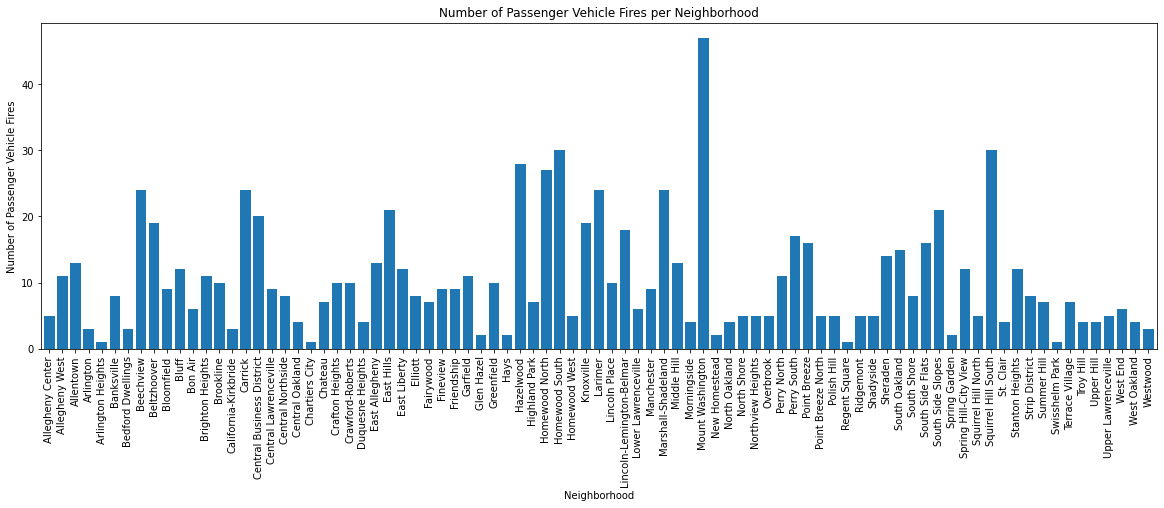

In [10]:
vehicle["neighborhood"].value_counts().sort_index().plot(kind='bar', width=.8, figsize=(20, 6), rot=90)

plt.title('Number of Passenger Vehicle Fires per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Passenger Vehicle Fires')
plt.show()

We can see from the two graphs that Carrick has the most amount of Building Fires at a little over 80 and Mount Washington has the most Passenger Vehicle Fires at a little over 40. We can examine these two neighborhoods a little more closely: Carrick also has about 25 Passenger Vehicle Fires and Mount Washington has about 45 Building Fires.

Carrick has the higher total, so we conclude that Carrick is the unsafest neighborhood in Pittsburgh.

In [11]:
di = dict()
for index, rows in building.iterrows():
    item_name = rows['neighborhood']
    
    if item_name in di:
        di[item_name] = di[item_name] + 1
    else:
        di[item_name] = 1   
print(di)

{nan: 312, 'Fairywood': 5, 'Lincoln-Lemington-Belmar': 50, 'Carrick': 83, 'Crafton Heights': 22, 'Perry North': 25, 'Bedford Dwellings': 8, 'East Allegheny': 21, 'Homewood North': 59, 'Beltzhoover': 45, 'Crawford-Roberts': 19, 'Middle Hill': 19, 'Greenfield': 18, 'Upper Hill': 17, 'Central Lawrenceville': 16, 'Hazelwood': 38, 'East Hills': 38, 'Allentown': 41, 'Central Business District': 26, 'Bloomfield': 38, 'Sheraden': 60, 'Beechview': 38, 'Garfield': 34, 'Marshall-Shadeland': 30, 'Swisshelm Park': 3, 'Troy Hill': 23, 'Larimer': 44, 'Brighton Heights': 41, 'Highland Park': 11, 'Mount Washington': 45, 'Brookline': 43, 'Point Breeze': 13, 'Bon Air': 2, 'Fineview': 7, 'Elliott': 17, 'Overbrook': 11, 'South Oakland': 10, 'Spring Hill-City View': 25, 'South Side Flats': 33, 'Squirrel Hill North': 23, 'Summer Hill': 4, 'Stanton Heights': 17, 'Knoxville': 67, 'Manchester': 17, 'Shadyside': 32, 'Lincoln Place': 10, 'South Side Slopes': 19, 'Duquesne Heights': 13, 'Central Oakland': 21, 'Hay

In [12]:
for index, rows in vehicle.iterrows():
    item_name = rows['neighborhood']

    if item_name in di:
        di[item_name] = di[item_name] + 1
    else:
        di[item_name] = 1   
print(di)

{nan: 533, 'Fairywood': 12, 'Lincoln-Lemington-Belmar': 68, 'Carrick': 107, 'Crafton Heights': 32, 'Perry North': 36, 'Bedford Dwellings': 11, 'East Allegheny': 34, 'Homewood North': 86, 'Beltzhoover': 64, 'Crawford-Roberts': 29, 'Middle Hill': 32, 'Greenfield': 28, 'Upper Hill': 21, 'Central Lawrenceville': 25, 'Hazelwood': 66, 'East Hills': 59, 'Allentown': 54, 'Central Business District': 46, 'Bloomfield': 47, 'Sheraden': 74, 'Beechview': 62, 'Garfield': 45, 'Marshall-Shadeland': 54, 'Swisshelm Park': 4, 'Troy Hill': 27, 'Larimer': 68, 'Brighton Heights': 52, 'Highland Park': 18, 'Mount Washington': 92, 'Brookline': 53, 'Point Breeze': 29, 'Bon Air': 8, 'Fineview': 16, 'Elliott': 25, 'Overbrook': 16, 'South Oakland': 25, 'Spring Hill-City View': 37, 'South Side Flats': 49, 'Squirrel Hill North': 28, 'Summer Hill': 11, 'Stanton Heights': 29, 'Knoxville': 86, 'Manchester': 26, 'Shadyside': 37, 'Lincoln Place': 20, 'South Side Slopes': 40, 'Duquesne Heights': 17, 'Central Oakland': 25,

In [14]:
series=pd.Series(di)
series = series.sort_values()
print(series)

New Homestead             2
Regent Square             2
Mount Oliver Borough      2
Glen Hazel                3
Arlington Heights         3
                       ... 
Homewood North           86
Knoxville                86
Mount Washington         92
Carrick                 107
NaN                     533
Length: 92, dtype: int64


New Homestead, Regent Square, and Mount Oliver Borough are tied as the safest neighborhoods in Pittsburgh. 